In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_csv('loan.csv')

In [79]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
df.drop('Loan_ID',axis=1,inplace=True)

In [81]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender','Married']
for col in null_cols:
    df[col]=df[col].fillna(df[col].dropna().mode().values[0])

In [83]:
num = df.select_dtypes('number').columns.to_list()
cat = df.select_dtypes('object').columns.to_list()
loan_num = df[num]
loan_cat = df[cat]

<Axes: xlabel='Loan_Status', ylabel='count'>

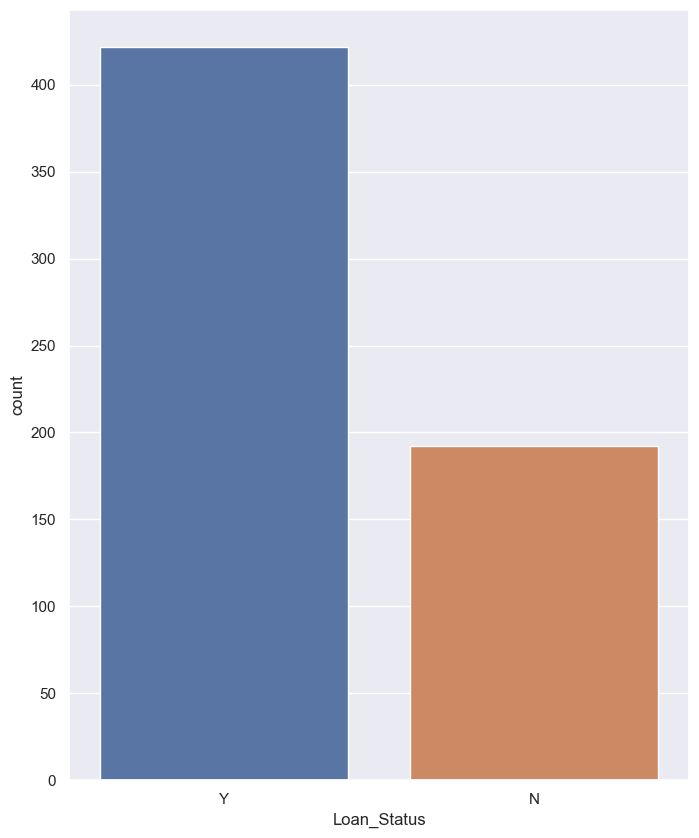

In [84]:
plt.figure(figsize=(8,10))
sns.countplot(data=df,x='Loan_Status')

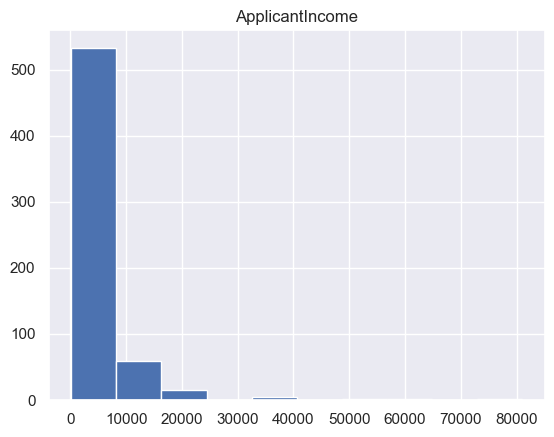

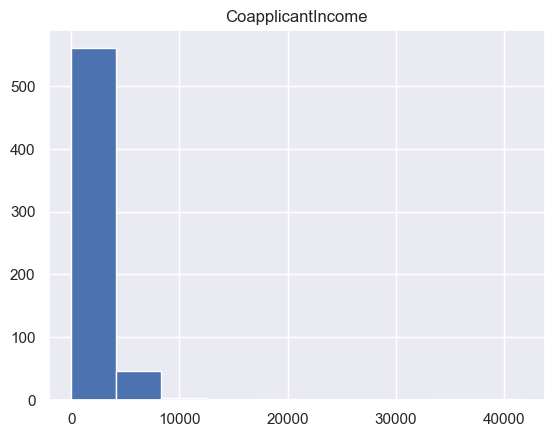

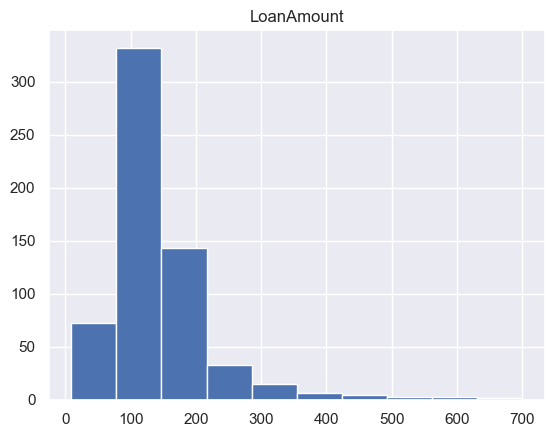

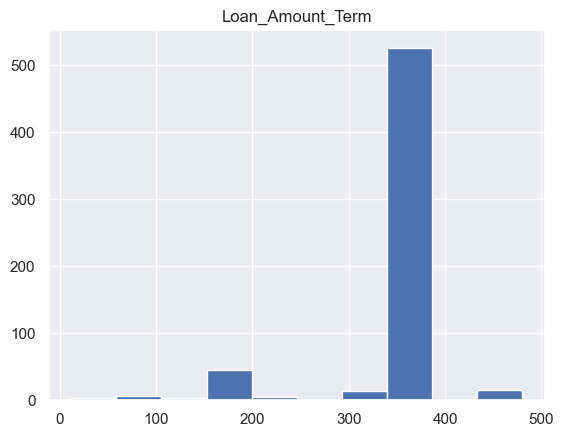

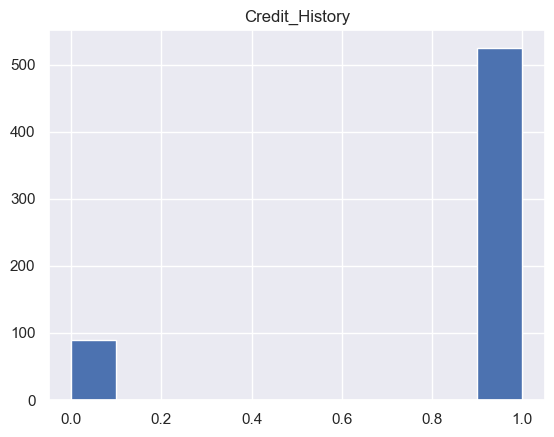

In [85]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

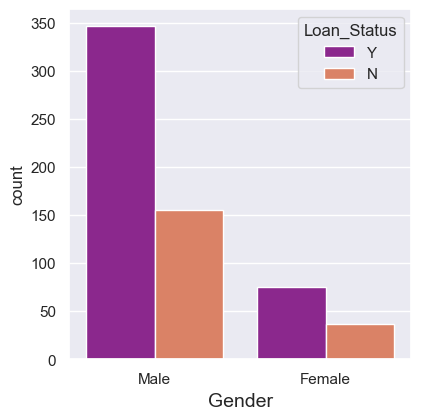

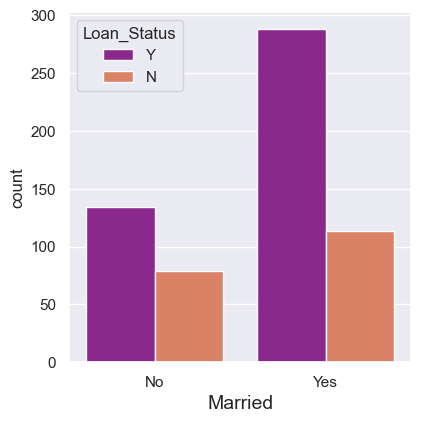

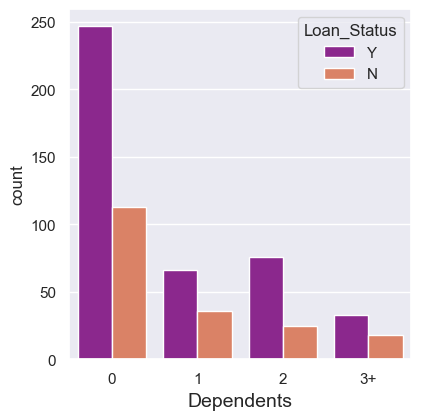

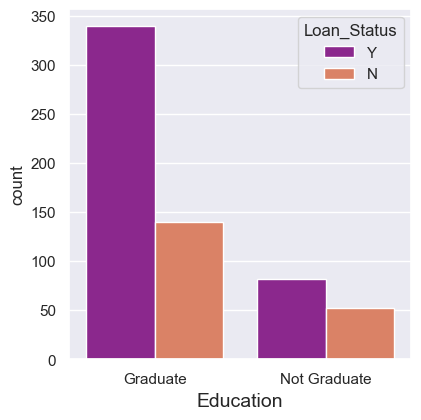

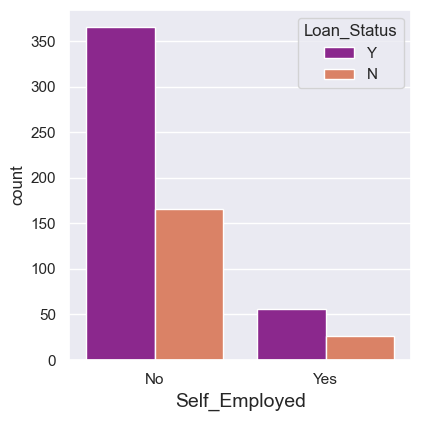

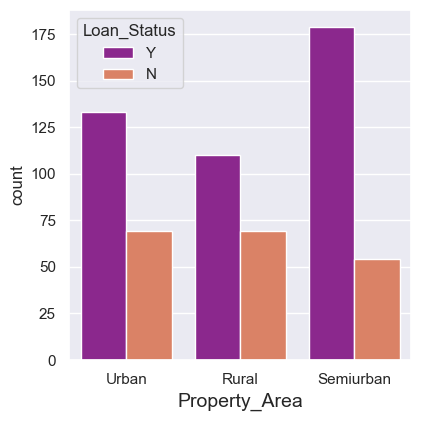

In [86]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue='Loan_Status',data=df,palette='plasma')
    plt.xlabel(i,fontsize=14)

In [87]:
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [88]:
df=df.applymap(lambda lable:to_numeric.get(lable) if lable in to_numeric else lable)

In [89]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [90]:
Dependents_ = pd.to_numeric(df.Dependents)

In [91]:
df.drop(['Dependents'], axis = 1, inplace = True)

In [92]:
df = pd.concat([df, Dependents_], axis = 1)

In [93]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,2,1,2,5849,0.0,120.0,360.0,1.0,3,1,0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


<Axes: >

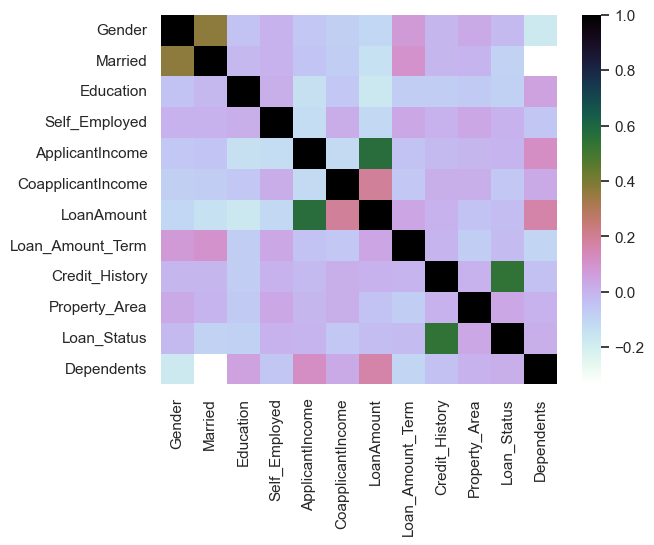

In [95]:
sns.heatmap(df.corr(),cmap='cubehelix_r')

In [96]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364569,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987,-0.172914
Married,0.364569,1.000000,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478,-0.334216
Education,-0.045364,-0.012304,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884,0.055752
Self_Employed,-0.000525,0.004489,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700,-0.056798
ApplicantIncome,-0.058809,-0.051708,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710,0.118202
CoapplicantIncome,-0.082912,-0.075948,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187,0.030430
LoanAmount,-0.106404,-0.146212,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808,0.163017
Loan_Amount_Term,0.074030,0.100912,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549,-0.103864
Credit_History,-0.009170,-0.010938,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556,-0.040160
Property_Area,0.025752,-0.004257,-0.065243,0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112,-0.000244


In [97]:
y=df['Loan_Status']
X=df.drop('Loan_Status',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [98]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print(classification_report(y_test,y_pred))
DT_SC=accuracy_score(y_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.46      0.55      0.50        51
           1       0.81      0.75      0.78       134

    accuracy                           0.70       185
   macro avg       0.64      0.65      0.64       185
weighted avg       0.72      0.70      0.70       185

69.73% Accurate


In [99]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
print(classification_report(y_test, y_predict))
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.74      0.49      0.59        51
           1       0.83      0.93      0.88       134

    accuracy                           0.81       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.80      0.81      0.80       185

81.08% Accurate


In [100]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)
print(classification_report(y_test, y_predict))
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185

79.46% Accurate


In [102]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
print(classification_report(y_test, y_predict))
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

83.24% Accurate


In [105]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'Models': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Models,Score
3,Logistic Regression,0.832432
1,Random Forest,0.810811
2,XGBoost,0.794595
0,Decision Tree,0.697297
